In [1]:
#Ce fichier consiste à étudier les données colléctées, les rendre utiles tout en les néttoyant et triyant, structurant analysant 

In [2]:
#Données colléctées : 
#fr_openfoodfacts_org_products 
#figures_dechets_alimentaires
#bf_ina_111
#reuses

In [2]:
#importation des bibliothèques 
import pandas as pd 
import numpy as np
import chardet
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
##1.Fichier bf_ina_111
#Ce fichier contient des données par région sur les quantités de déchets ménagers et assimilés collectés en tonnes et en kilogrammes par habitant.
#Cela peut aider à :
#Identifier les régions où la production de déchets par habitant est plus élevée.
#Prioriser les efforts pour sensibiliser les utilisateurs à mieux trier ou recycler dans ces zones. 

In [3]:
file_path = "./bf_ina_111.xlsx"  

#On lit le fichier en ignorant les 2 premières lignes qui contiennent le titre et des cellules fusionnées
df = pd.read_excel(file_path, sheet_name='Figure 1', skiprows=2)

df.head()

,Unnamed: 0,Unnamed: 1,en tonnes,en kg / habitant
0,11,Ile-de-France,5567365.0,453.0
1,24,Centre-Val de Loire,1416534.0,550.0
2,27,Bourgogne-Franche-Comté,1477751.0,529.0
3,28,Normandie,2126793.0,640.0
4,32,Hauts-de-France,3707006.0,619.0


## Nettoyage et analyse des données de la figure 1

In [4]:
#On renomme les colonnes pour les rendre exploitables
df.columns = ['Code région', 'Région', 'Déchets en tonnes', 'Déchets en kg par habitant']

#On supprime les lignes contenant des valeurs nulles
df.dropna(inplace=True)

#On supprime la dernière ligne qui contient les totaux (France métropolitaine)
df = df[df['Région'] != 'France métropolitaine']

#On nettoye les colonnes numériques en supprimant les espaces et convertir en entiers
df['Déchets en tonnes'] = df['Déchets en tonnes'].replace(r'\s+', '', regex=True).astype(int)
df['Déchets en kg par habitant'] = df['Déchets en kg par habitant'].astype(int)

print("\nTypes de données après nettoyage :")
print(df.dtypes)


Types de données après nettoyage :
Code région                   object
Région                        object
Déchets en tonnes              int32
Déchets en kg par habitant     int32
dtype: object


In [5]:
# Analyser les statistiques descriptives des colonnes numériques
print("\nStatistiques descriptives :")
print(df.describe())

print("\nAperçu des données nettoyées :")
print(df.head())


Statistiques descriptives :
       Déchets en tonnes  Déchets en kg par habitant
count       1.300000e+01                   13.000000
mean        2.752788e+06                  573.615385
std         1.384363e+06                   74.486619
min         2.510340e+05                  453.000000
25%         2.005822e+06                  520.000000
50%         2.784243e+06                  567.000000
75%         3.563565e+06                  623.000000
max         5.567365e+06                  725.000000

Aperçu des données nettoyées :
  Code région                   Région  Déchets en tonnes  \
0          11            Ile-de-France            5567365   
1          24      Centre-Val de Loire            1416534   
2          27  Bourgogne-Franche-Comté            1477751   
3          28                Normandie            2126793   
4          32          Hauts-de-France            3707006   

   Déchets en kg par habitant  
0                         453  
1                         550  

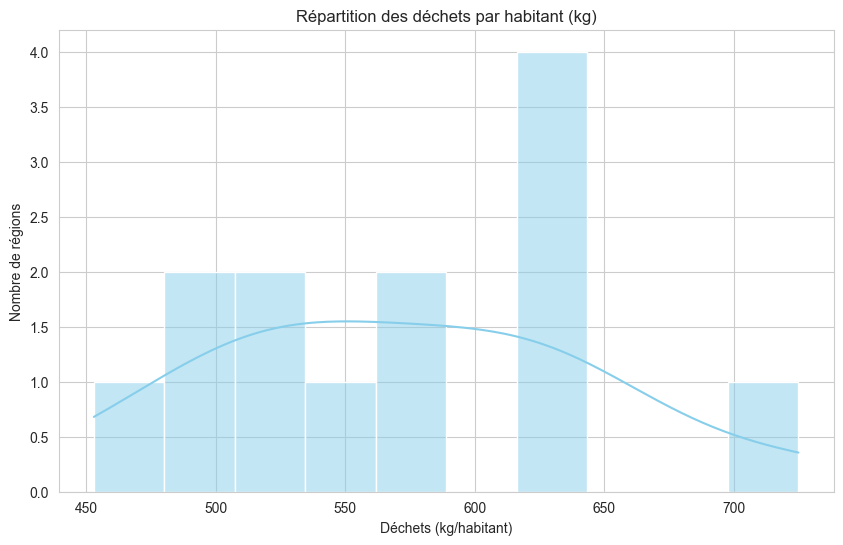

C:\Users\sonia\AppData\Local\Temp\ipykernel_35104\3845807840.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Déchets en tonnes', y='Région', data=df, palette="viridis")


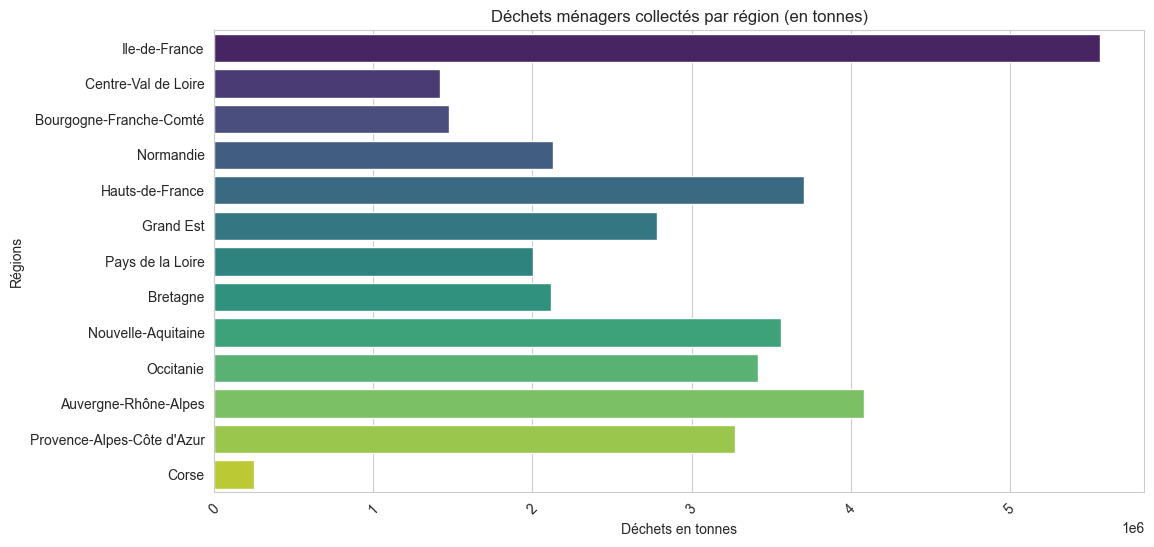

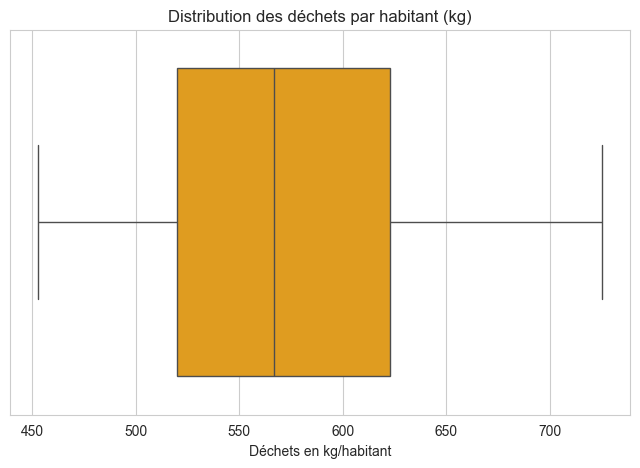

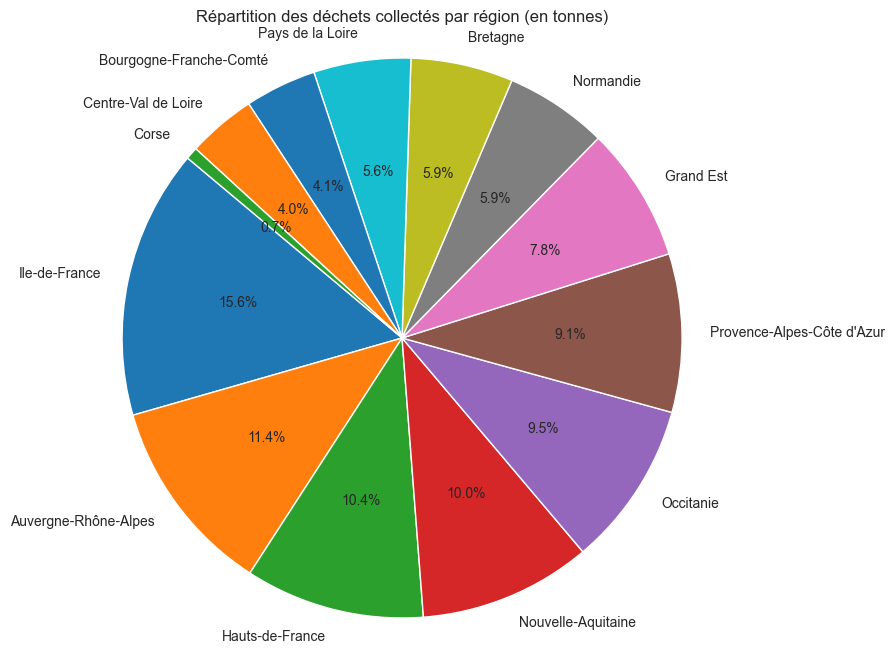

In [6]:
sns.set_style("whitegrid")

#Histogramme des déchets en kg par habitan
plt.figure(figsize=(10, 6))
sns.histplot(df['Déchets en kg par habitant'], bins=10, kde=True, color='skyblue')
plt.title('Répartition des déchets par habitant (kg)')
plt.xlabel('Déchets (kg/habitant)')
plt.ylabel('Nombre de régions')
plt.show()

#Graphique en barres des déchets en tonnes par région
plt.figure(figsize=(12, 6))
sns.barplot(x='Déchets en tonnes', y='Région', data=df, palette="viridis")
plt.title('Déchets ménagers collectés par région (en tonnes)')
plt.xlabel('Déchets en tonnes')
plt.ylabel('Régions')
plt.xticks(rotation=45)
plt.show()

#Boîte à moustaches (boxplot) pour détecter les outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Déchets en kg par habitant'], color='orange')
plt.title('Distribution des déchets par habitant (kg)')
plt.xlabel('Déchets en kg/habitant')
plt.show()

#Diagramme circulaire (Pie chart) pour la répartition des déchets par région
plt.figure(figsize=(10, 8))
df_sorted = df.sort_values(by='Déchets en tonnes', ascending=False)
plt.pie(df_sorted['Déchets en tonnes'], labels=df_sorted['Région'], autopct='%1.1f%%', startangle=140)
plt.title('Répartition des déchets collectés par région (en tonnes)')
plt.axis('equal')  # Assurer un affichage circulaire
plt.show()

1. Analyse générale des déchets collectés :
Les données montrent une variation significative des déchets collectés par région, avec des valeurs allant de quelques centaines de milliers de tonnes à plusieurs millions de tonnes.
La région Ile-de-France est celle qui génère le plus de déchets en tonnes, ce qui est attendu étant donné sa densité de population élevée.
À l'inverse, la Corse affiche la plus faible quantité de déchets collectés, ce qui est cohérent avec sa population plus réduite.

In [7]:
#sauvegarder les donnée nettoyées
df.to_csv("dechets_nettoyes.csv", index=False)
print("\nDonnées nettoyées sauvegardées dans 'dechets_nettoyes.csv'")


Données nettoyées sauvegardées dans 'dechets_nettoyes.csv'


## Nettoyage et analyse des données de la figure 2

In [49]:
# Cette figure a une importance très elevée car elle aide les utilisateurs à avoir plus d'informations par rapport au tri selon le materiel du dèchet

In [13]:
file_path = "./bf_ina_111.xlsx"  

#On lit le fichier en ignorant les 2 premières lignes qui contiennent le titre et des cellules fusionnées
df = pd.read_excel(file_path, sheet_name='Figure 2', skiprows=2)

df.head()

,Unnamed: 0,Bourgogne-Franche-Comté,France métropolitaine,Unnamed: 3
0,Ordures ménagères résiduelles,187.0,245.0,-24.0
1,Matériaux recyclables,160.0,126.0,27.0
2,Déchets verts et biodéchets,88.0,84.0,5.0
3,Encombrants,72.0,77.0,-7.0
4,Déchets dangereux et autres,22.0,15.0,44.0


In [14]:
    try:
    
        df.columns = ['Type de déchets', 'Bourgogne-Franche-Comté', 'France métropolitaine', 'Écart (%)']

        # Suppression des lignes contenant des valeurs nulles ou inutiles
        df.dropna(inplace=True)

        print("Types de données avant nettoyage :")
        print(df.dtypes)

        #On convertie les colonnes numériques au bon format
        df['Bourgogne-Franche-Comté'] = df['Bourgogne-Franche-Comté'].astype(float)
        df['France métropolitaine'] = df['France métropolitaine'].astype(float)
        df['Écart (%)'] = df['Écart (%)'].astype(float)

        # Vérification après conversion
        print("\nTypes de données après nettoyage :")
        print(df.dtypes)

        
        print("\nStatistiques descriptives des colonnes numériques :")
        print(df.describe())

        # Aperçu des données nettoyées
        print("\nAperçu des données nettoyées :")
        print(df.head())

    except Exception as e:
        print(f"Erreur lors de la lecture du fichier : {e}")


Types de données avant nettoyage :
Type de déchets             object
Bourgogne-Franche-Comté    float64
France métropolitaine      float64
Écart (%)                  float64
dtype: object

Types de données après nettoyage :
Type de déchets             object
Bourgogne-Franche-Comté    float64
France métropolitaine      float64
Écart (%)                  float64
dtype: object

Statistiques descriptives des colonnes numériques :
       Bourgogne-Franche-Comté  France métropolitaine  Écart (%)
count                 6.000000               6.000000   6.000000
mean                176.333333             182.333333   7.000000
std                 182.899608             194.343682  24.617067
min                  22.000000              15.000000 -24.000000
25%                  76.000000              78.750000  -6.000000
50%                 124.000000             105.000000   1.000000
75%                 180.250000             215.250000  21.500000
max                 529.000000             547.0

## Analyse données : 


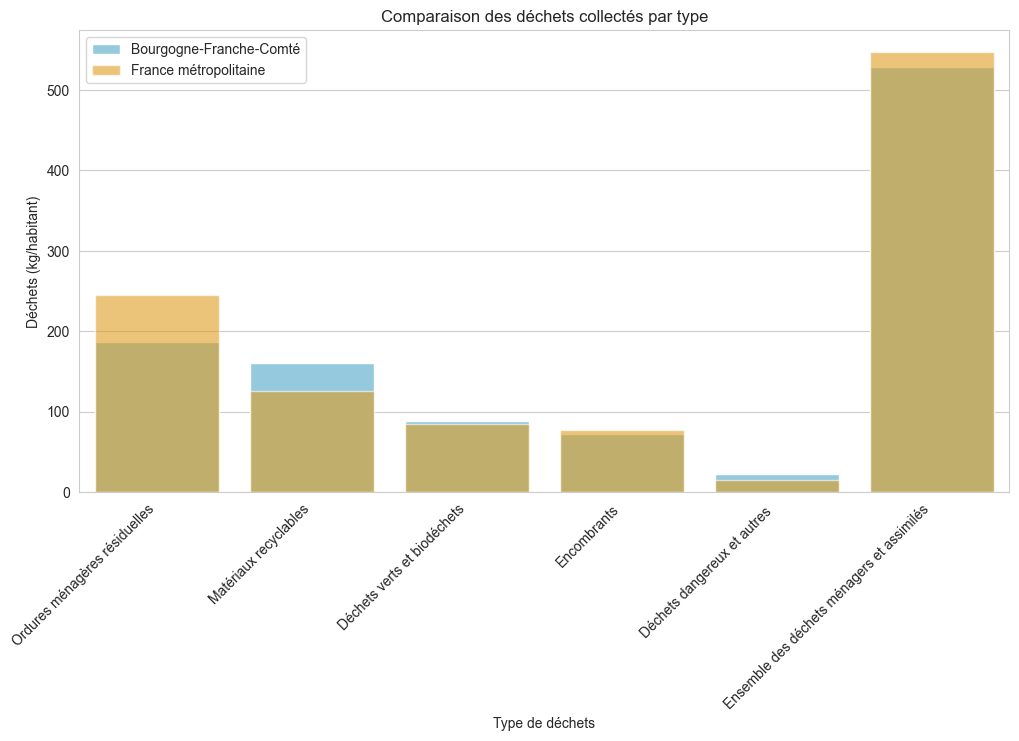

C:\Users\sonia\AppData\Local\Temp\ipykernel_2904\3290082557.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Type de déchets'], y=df['Écart (%)'], palette='coolwarm')


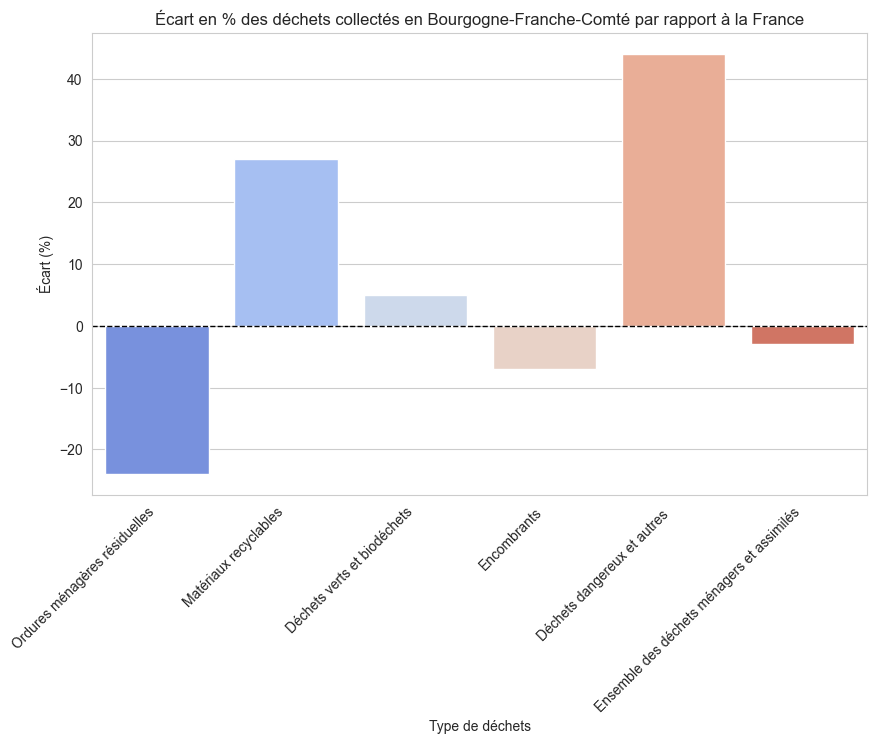

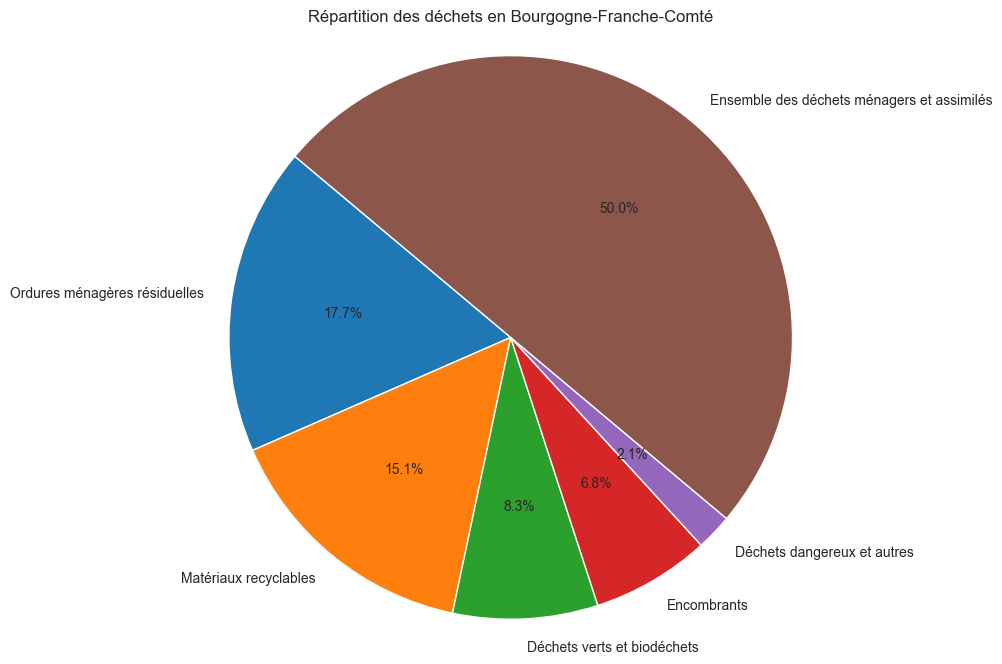

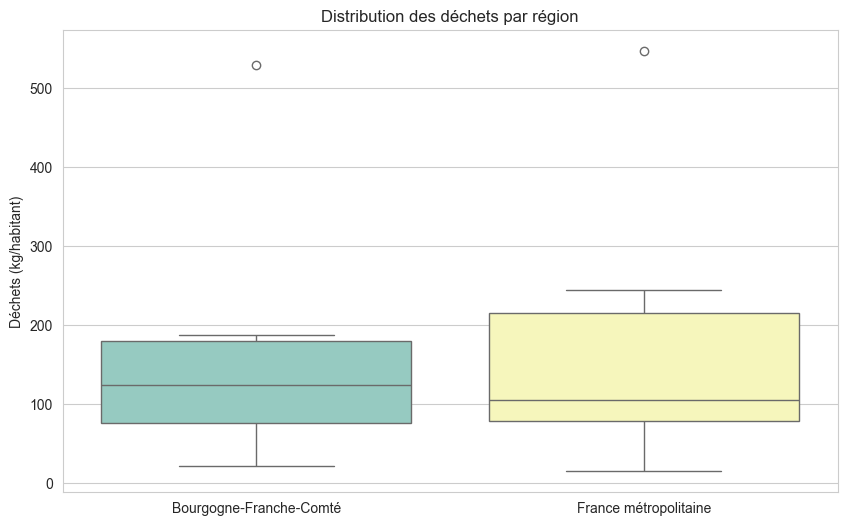

In [15]:
#Répartition des déchets collectés par catégorie : Bourgogne-Franche-Comté vs Moyenne Nationale
plt.figure(figsize=(12, 6))
sns.barplot(x=df['Type de déchets'], y=df['Bourgogne-Franche-Comté'], color='skyblue', label='Bourgogne-Franche-Comté')
sns.barplot(x=df['Type de déchets'], y=df['France métropolitaine'], color='orange', alpha=0.6, label='France métropolitaine')
plt.title("Comparaison des déchets collectés par type")
plt.ylabel("Déchets (kg/habitant)")
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

#Graphique en barres de l'écart en pourcentage entre Bourgogne-Franche-Comté et France métropolitaine**
plt.figure(figsize=(10, 6))
sns.barplot(x=df['Type de déchets'], y=df['Écart (%)'], palette='coolwarm')
plt.title("Écart en % des déchets collectés en Bourgogne-Franche-Comté par rapport à la France")
plt.ylabel("Écart (%)")
plt.xlabel("Type de déchets")
plt.xticks(rotation=45, ha="right")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

#Diagramme circulaire pour la répartition des déchets en Bourgogne-Franche-Comté
plt.figure(figsize=(8, 8))
plt.pie(df['Bourgogne-Franche-Comté'], labels=df['Type de déchets'], autopct='%1.1f%%', startangle=140)
plt.title("Répartition des déchets en Bourgogne-Franche-Comté")
plt.axis('equal')  
plt.show()

# Visualiser la dispersion des déchets par type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Bourgogne-Franche-Comté', 'France métropolitaine']], palette="Set3")
plt.title("Distribution des déchets par région")
plt.ylabel("Déchets (kg/habitant)")
plt.show()

2.Analyse globale des ghraphiques :
La région Bourgogne-Franche-Comté collecte 160 kg/habitant de matériaux recyclables, soit une augmentation de +27% par rapport à la moyenne nationale. Cela traduit une forte sensibilisation au tri sélectif et une infrastructure efficace.

La quantité d’ordures ménagères résiduelles est inférieure de 24% à la moyenne nationale, indiquant une réduction des déchets à la source et une meilleure gestion du tri.

Les déchets verts et biodéchets sont légèrement plus élevés en Bourgogne-Franche-Comté (+5%), ce qui peut être attribué à la forte présence de zones rurales favorisant le compostage.

Les encombrants, quant à eux, sont collectés en moindre quantité (-7%) par rapport à la moyenne française, ce qui peut indiquer des pratiques locales de réemploi ou de réparation des objets usagés.

Une hausse significative est observée pour les déchets dangereux et autres, avec un écart de +44%. Cela suggère une meilleure collecte de ces déchets spécifiques ou une activité industrielle plus importante dans la région.

#Sauvegarde des données nettoyées

In [16]:
csv_file_path = "dechets_figure2_nettoyes.csv"
df.to_csv(csv_file_path, index=False)
print(f"\nDonnées nettoyées sauvegardées dans '{csv_file_path}'")


Données nettoyées sauvegardées dans 'dechets_figure2_nettoyes.csv'
